In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import api_key
from datetime import datetime
from pandas import Timestamp
import requests
import scipy.stats as stats

In [2]:
bigfoot_weather_df = pd.read_csv("Bigfoot Weather Data.csv")
bigfoot_weather_df.head()

,Unnamed: 0,county,state,date,latitude,longitude,season,temperature_high,temperature_low,cloud_cover,precip_intensity,visibility,conditions,wind_speed,Precip Intensity Groups,Visibility Classification (mi),Cloud Cover Classification (%)
0,1,Wyoming County,West Virginia,2005-12-03,37.58135,-81.29745,Winter,37.8,21.6,66.7,0.204,9.3,"Snow, Rain, Partially cloudy",17.1,moderate: 0.1 to 0.3,Clear: 6.21 to 12.43,Mostly Cloudy: 62.5 to 87.5
1,2,Windsor County,Vermont,2005-10-08,43.46540,-72.70510,Fall,64.3,45.9,100.0,3.208,5.0,"Rain, Overcast",7.6,violent: >2,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100
2,3,Wythe County,Virginia,1984-04-08,37.22647,-81.09017,Spring,59.0,37.0,76.2,0.000,13.0,Partially cloudy,11.5,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Cloudy: 62.5 to 87.5
3,7,Washington County,Rhode Island,1974-09-20,41.45000,-71.50000,Fall,78.2,65.9,96.7,0.000,2.6,Overcast,15.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100
4,10,Washita County,Oklahoma,1973-09-28,35.30110,-99.17020,Fall,72.6,47.6,14.0,0.000,20.4,Clear,12.7,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Sunny: 6.25 to 25


In [3]:
dates = pd.DataFrame(bigfoot_weather_df['date'] + " 12:00:00")
dates_unix = pd.to_datetime(bigfoot_weather_df["date"])
unix = dates_unix.view("int64")
unix
bigfoot_weather_df["unix"] = unix
bigfoot_weather_df

,Unnamed: 0,county,state,date,latitude,longitude,season,temperature_high,temperature_low,cloud_cover,precip_intensity,visibility,conditions,wind_speed,Precip Intensity Groups,Visibility Classification (mi),Cloud Cover Classification (%),unix
0,1,Wyoming County,West Virginia,2005-12-03,37.58135,-81.29745,Winter,37.8,21.6,66.7,0.204,9.3,"Snow, Rain, Partially cloudy",17.1,moderate: 0.1 to 0.3,Clear: 6.21 to 12.43,Mostly Cloudy: 62.5 to 87.5,1133568000000000000
1,2,Windsor County,Vermont,2005-10-08,43.46540,-72.70510,Fall,64.3,45.9,100.0,3.208,5.0,"Rain, Overcast",7.6,violent: >2,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100,1128729600000000000
2,3,Wythe County,Virginia,1984-04-08,37.22647,-81.09017,Spring,59.0,37.0,76.2,0.000,13.0,Partially cloudy,11.5,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Cloudy: 62.5 to 87.5,450230400000000000
3,7,Washington County,Rhode Island,1974-09-20,41.45000,-71.50000,Fall,78.2,65.9,96.7,0.000,2.6,Overcast,15.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100,148867200000000000
4,10,Washita County,Oklahoma,1973-09-28,35.30110,-99.17020,Fall,72.6,47.6,14.0,0.000,20.4,Clear,12.7,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Sunny: 6.25 to 25,118022400000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,5069,Baker County,Florida,2006-04-12,30.43412,-82.28943,Spring,75.7,58.0,53.0,0.000,8.5,Partially cloudy,15.8,light: 0 to 0.1,Clear: 6.21 to 12.43,Partly Cloudy/Sunny: 25 to 62.5,1144800000000000000
2839,5070,Alachua County,Florida,1963-09-15,29.67757,-82.35501,Unknown,80.0,64.9,85.2,0.078,13.6,"Rain, Partially cloudy",9.2,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Cloudy: 62.5 to 87.5,-198720000000000000
2840,5071,Alachua County,Florida,1985-09-29,29.77535,-82.36570,Fall,84.0,66.8,37.9,0.000,6.1,Partially cloudy,16.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Partly Cloudy/Sunny: 25 to 62.5,496800000000000000
2841,5072,Alachua County,Florida,2000-06-13,29.58358,-82.33316,Summer,93.5,69.2,33.5,0.000,8.5,Partially cloudy,11.5,light: 0 to 0.1,Clear: 6.21 to 12.43,Partly Cloudy/Sunny: 25 to 62.5,960854400000000000


In [16]:
temp_avgs = (bigfoot_weather_df['temperature_high'] + bigfoot_weather_df['temperature_low']) / 2
temp_avg = temp_avgs.mean()
bigfoot_weather_df["Temperature Average"] = temp_avgs
bigfoot_weather_df["Expected Temperature"] = temp_avg


,Unnamed: 0,county,state,date,latitude,longitude,season,temperature_high,temperature_low,cloud_cover,...,visibility,conditions,wind_speed,Precip Intensity Groups,Visibility Classification (mi),Cloud Cover Classification (%),unix,Expected Temperature,Temperature Average,Expected Precipitation
0,1,Wyoming County,West Virginia,2005-12-03,37.58135,-81.29745,Winter,37.8,21.6,66.7,...,9.3,"Snow, Rain, Partially cloudy",17.1,moderate: 0.1 to 0.3,Clear: 6.21 to 12.43,Mostly Cloudy: 62.5 to 87.5,1133568000000000000,59.071456,29.70,0.093595
1,2,Windsor County,Vermont,2005-10-08,43.46540,-72.70510,Fall,64.3,45.9,100.0,...,5.0,"Rain, Overcast",7.6,violent: >2,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100,1128729600000000000,59.071456,55.10,0.093595
2,3,Wythe County,Virginia,1984-04-08,37.22647,-81.09017,Spring,59.0,37.0,76.2,...,13.0,Partially cloudy,11.5,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Cloudy: 62.5 to 87.5,450230400000000000,59.071456,48.00,0.093595
3,7,Washington County,Rhode Island,1974-09-20,41.45000,-71.50000,Fall,78.2,65.9,96.7,...,2.6,Overcast,15.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100,148867200000000000,59.071456,72.05,0.093595
4,10,Washita County,Oklahoma,1973-09-28,35.30110,-99.17020,Fall,72.6,47.6,14.0,...,20.4,Clear,12.7,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Sunny: 6.25 to 25,118022400000000000,59.071456,60.10,0.093595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,5069,Baker County,Florida,2006-04-12,30.43412,-82.28943,Spring,75.7,58.0,53.0,...,8.5,Partially cloudy,15.8,light: 0 to 0.1,Clear: 6.21 to 12.43,Partly Cloudy/Sunny: 25 to 62.5,1144800000000000000,59.071456,66.85,0.093595
2839,5070,Alachua County,Florida,1963-09-15,29.67757,-82.35501,Unknown,80.0,64.9,85.2,...,13.6,"Rain, Partially cloudy",9.2,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Cloudy: 62.5 to 87.5,-198720000000000000,59.071456,72.45,0.093595
2840,5071,Alachua County,Florida,1985-09-29,29.77535,-82.36570,Fall,84.0,66.8,37.9,...,6.1,Partially cloudy,16.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Partly Cloudy/Sunny: 25 to 62.5,496800000000000000,59.071456,75.40,0.093595
2841,5072,Alachua County,Florida,2000-06-13,29.58358,-82.33316,Summer,93.5,69.2,33.5,...,8.5,Partially cloudy,11.5,light: 0 to 0.1,Clear: 6.21 to 12.43,Partly Cloudy/Sunny: 25 to 62.5,960854400000000000,59.071456,81.35,0.093595


In [14]:
precip_avgs = (bigfoot_weather_df['precip_intensity']).mean()
bigfoot_weather_df["Expected Precipitation"] = precip_avgs


,Unnamed: 0,county,state,date,latitude,longitude,season,temperature_high,temperature_low,cloud_cover,...,visibility,conditions,wind_speed,Precip Intensity Groups,Visibility Classification (mi),Cloud Cover Classification (%),unix,Expected Temperature,Temperature Average,Expected Precipitation
0,1,Wyoming County,West Virginia,2005-12-03,37.58135,-81.29745,Winter,37.8,21.6,66.7,...,9.3,"Snow, Rain, Partially cloudy",17.1,moderate: 0.1 to 0.3,Clear: 6.21 to 12.43,Mostly Cloudy: 62.5 to 87.5,1133568000000000000,59.071456,29.70,0.093595
1,2,Windsor County,Vermont,2005-10-08,43.46540,-72.70510,Fall,64.3,45.9,100.0,...,5.0,"Rain, Overcast",7.6,violent: >2,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100,1128729600000000000,59.071456,55.10,0.093595
2,3,Wythe County,Virginia,1984-04-08,37.22647,-81.09017,Spring,59.0,37.0,76.2,...,13.0,Partially cloudy,11.5,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Cloudy: 62.5 to 87.5,450230400000000000,59.071456,48.00,0.093595
3,7,Washington County,Rhode Island,1974-09-20,41.45000,-71.50000,Fall,78.2,65.9,96.7,...,2.6,Overcast,15.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100,148867200000000000,59.071456,72.05,0.093595
4,10,Washita County,Oklahoma,1973-09-28,35.30110,-99.17020,Fall,72.6,47.6,14.0,...,20.4,Clear,12.7,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Sunny: 6.25 to 25,118022400000000000,59.071456,60.10,0.093595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,5069,Baker County,Florida,2006-04-12,30.43412,-82.28943,Spring,75.7,58.0,53.0,...,8.5,Partially cloudy,15.8,light: 0 to 0.1,Clear: 6.21 to 12.43,Partly Cloudy/Sunny: 25 to 62.5,1144800000000000000,59.071456,66.85,0.093595
2839,5070,Alachua County,Florida,1963-09-15,29.67757,-82.35501,Unknown,80.0,64.9,85.2,...,13.6,"Rain, Partially cloudy",9.2,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Cloudy: 62.5 to 87.5,-198720000000000000,59.071456,72.45,0.093595
2840,5071,Alachua County,Florida,1985-09-29,29.77535,-82.36570,Fall,84.0,66.8,37.9,...,6.1,Partially cloudy,16.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Partly Cloudy/Sunny: 25 to 62.5,496800000000000000,59.071456,75.40,0.093595
2841,5072,Alachua County,Florida,2000-06-13,29.58358,-82.33316,Summer,93.5,69.2,33.5,...,8.5,Partially cloudy,11.5,light: 0 to 0.1,Clear: 6.21 to 12.43,Partly Cloudy/Sunny: 25 to 62.5,960854400000000000,59.071456,81.35,0.093595


In [17]:
cloudcover_avgs = (bigfoot_weather_df['cloud_cover']).mean()
bigfoot_weather_df["Expected Cloud Cover"] = cloudcover_avgs


,Unnamed: 0,county,state,date,latitude,longitude,season,temperature_high,temperature_low,cloud_cover,...,conditions,wind_speed,Precip Intensity Groups,Visibility Classification (mi),Cloud Cover Classification (%),unix,Expected Temperature,Temperature Average,Expected Precipitation,Expected Cloud Cover
0,1,Wyoming County,West Virginia,2005-12-03,37.58135,-81.29745,Winter,37.8,21.6,66.7,...,"Snow, Rain, Partially cloudy",17.1,moderate: 0.1 to 0.3,Clear: 6.21 to 12.43,Mostly Cloudy: 62.5 to 87.5,1133568000000000000,59.071456,29.70,0.093595,45.721702
1,2,Windsor County,Vermont,2005-10-08,43.46540,-72.70510,Fall,64.3,45.9,100.0,...,"Rain, Overcast",7.6,violent: >2,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100,1128729600000000000,59.071456,55.10,0.093595,45.721702
2,3,Wythe County,Virginia,1984-04-08,37.22647,-81.09017,Spring,59.0,37.0,76.2,...,Partially cloudy,11.5,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Cloudy: 62.5 to 87.5,450230400000000000,59.071456,48.00,0.093595,45.721702
3,7,Washington County,Rhode Island,1974-09-20,41.45000,-71.50000,Fall,78.2,65.9,96.7,...,Overcast,15.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100,148867200000000000,59.071456,72.05,0.093595,45.721702
4,10,Washita County,Oklahoma,1973-09-28,35.30110,-99.17020,Fall,72.6,47.6,14.0,...,Clear,12.7,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Sunny: 6.25 to 25,118022400000000000,59.071456,60.10,0.093595,45.721702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,5069,Baker County,Florida,2006-04-12,30.43412,-82.28943,Spring,75.7,58.0,53.0,...,Partially cloudy,15.8,light: 0 to 0.1,Clear: 6.21 to 12.43,Partly Cloudy/Sunny: 25 to 62.5,1144800000000000000,59.071456,66.85,0.093595,45.721702
2839,5070,Alachua County,Florida,1963-09-15,29.67757,-82.35501,Unknown,80.0,64.9,85.2,...,"Rain, Partially cloudy",9.2,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Cloudy: 62.5 to 87.5,-198720000000000000,59.071456,72.45,0.093595,45.721702
2840,5071,Alachua County,Florida,1985-09-29,29.77535,-82.36570,Fall,84.0,66.8,37.9,...,Partially cloudy,16.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Partly Cloudy/Sunny: 25 to 62.5,496800000000000000,59.071456,75.40,0.093595,45.721702
2841,5072,Alachua County,Florida,2000-06-13,29.58358,-82.33316,Summer,93.5,69.2,33.5,...,Partially cloudy,11.5,light: 0 to 0.1,Clear: 6.21 to 12.43,Partly Cloudy/Sunny: 25 to 62.5,960854400000000000,59.071456,81.35,0.093595,45.721702


In [18]:
visibility_avgs = (bigfoot_weather_df['visibility']).mean()
bigfoot_weather_df["Expected Visibility"] = visibility_avgs

bigfoot_weather_df

,Unnamed: 0,county,state,date,latitude,longitude,season,temperature_high,temperature_low,cloud_cover,...,wind_speed,Precip Intensity Groups,Visibility Classification (mi),Cloud Cover Classification (%),unix,Expected Temperature,Temperature Average,Expected Precipitation,Expected Cloud Cover,Expected Visibility
0,1,Wyoming County,West Virginia,2005-12-03,37.58135,-81.29745,Winter,37.8,21.6,66.7,...,17.1,moderate: 0.1 to 0.3,Clear: 6.21 to 12.43,Mostly Cloudy: 62.5 to 87.5,1133568000000000000,59.071456,29.70,0.093595,45.721702,9.977664
1,2,Windsor County,Vermont,2005-10-08,43.46540,-72.70510,Fall,64.3,45.9,100.0,...,7.6,violent: >2,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100,1128729600000000000,59.071456,55.10,0.093595,45.721702,9.977664
2,3,Wythe County,Virginia,1984-04-08,37.22647,-81.09017,Spring,59.0,37.0,76.2,...,11.5,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Cloudy: 62.5 to 87.5,450230400000000000,59.071456,48.00,0.093595,45.721702,9.977664
3,7,Washington County,Rhode Island,1974-09-20,41.45000,-71.50000,Fall,78.2,65.9,96.7,...,15.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Cloudy/Overcast: 87.5 to 100,148867200000000000,59.071456,72.05,0.093595,45.721702,9.977664
4,10,Washita County,Oklahoma,1973-09-28,35.30110,-99.17020,Fall,72.6,47.6,14.0,...,12.7,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Sunny: 6.25 to 25,118022400000000000,59.071456,60.10,0.093595,45.721702,9.977664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,5069,Baker County,Florida,2006-04-12,30.43412,-82.28943,Spring,75.7,58.0,53.0,...,15.8,light: 0 to 0.1,Clear: 6.21 to 12.43,Partly Cloudy/Sunny: 25 to 62.5,1144800000000000000,59.071456,66.85,0.093595,45.721702,9.977664
2839,5070,Alachua County,Florida,1963-09-15,29.67757,-82.35501,Unknown,80.0,64.9,85.2,...,9.2,light: 0 to 0.1,Very Clear: 12.43 to 31.06,Mostly Cloudy: 62.5 to 87.5,-198720000000000000,59.071456,72.45,0.093595,45.721702,9.977664
2840,5071,Alachua County,Florida,1985-09-29,29.77535,-82.36570,Fall,84.0,66.8,37.9,...,16.0,light: 0 to 0.1,Light Haze: 2.48 to 6.21,Partly Cloudy/Sunny: 25 to 62.5,496800000000000000,59.071456,75.40,0.093595,45.721702,9.977664
2841,5072,Alachua County,Florida,2000-06-13,29.58358,-82.33316,Summer,93.5,69.2,33.5,...,11.5,light: 0 to 0.1,Clear: 6.21 to 12.43,Partly Cloudy/Sunny: 25 to 62.5,960854400000000000,59.071456,81.35,0.093595,45.721702,9.977664


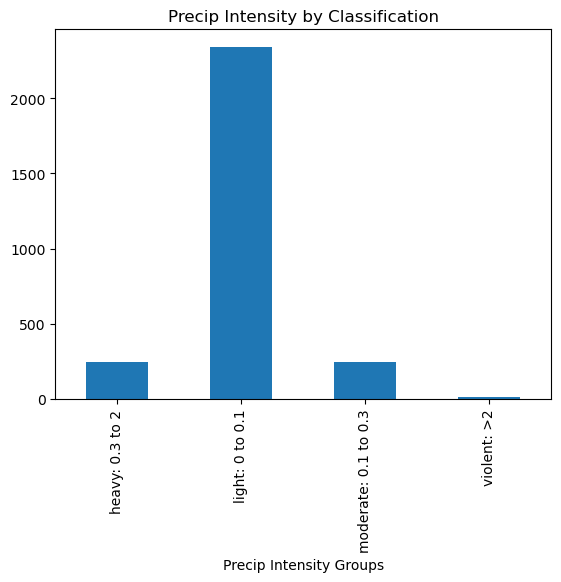

In [20]:
precip_groups = bigfoot_weather_df.groupby('Precip Intensity Groups')
precip_counts = precip_groups['Precip Intensity Groups'].count()

precip_chart = precip_counts.plot(kind="bar", title="Precip Intensity by Classification")

plt.show()

In [27]:
# The degree of freedom is 4-1 = 3
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 3)

#Display the critical value
critical_value

7.814727903251179

In [28]:
stats.chisquare(bigfoot_weather_df['precip_intensity'], bigfoot_weather_df['Expected Precipitation'])


Power_divergenceResult(statistic=2569.9207864932946, pvalue=0.9999011697690071)

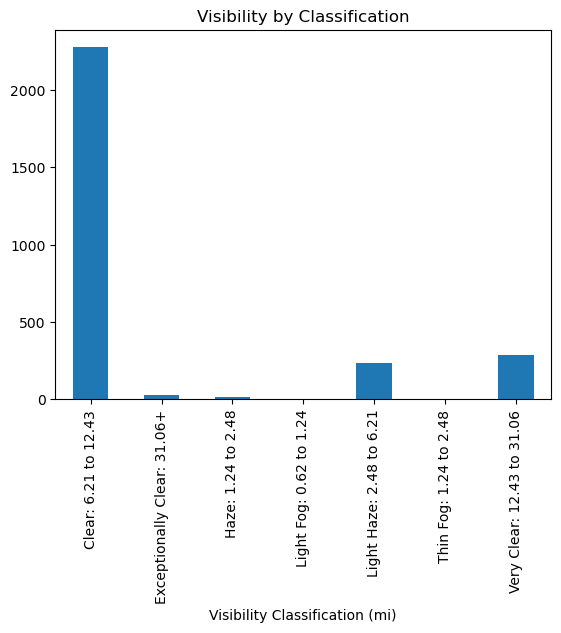

In [22]:
visibility_groups = bigfoot_weather_df.groupby('Visibility Classification (mi)')
visibility_counts = visibility_groups['Visibility Classification (mi)'].count()

visibility_chart = visibility_counts.plot(kind="bar", title="Visibility by Classification")

plt.show()

In [29]:
# The degree of freedom is 7-1 = 6
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 6)

#Display the critical value
critical_value

12.591587243743977

In [30]:
stats.chisquare(bigfoot_weather_df['visibility'], bigfoot_weather_df['Expected Visibility'])


Power_divergenceResult(statistic=6520.128241411463, pvalue=4.730756700723386e-289)

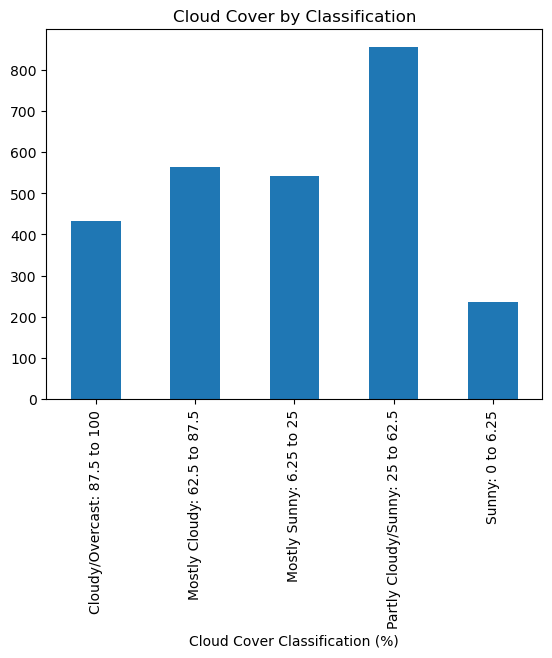

In [24]:
cloudcover_groups = bigfoot_weather_df.groupby('Cloud Cover Classification (%)')
cloudcover_counts = cloudcover_groups['Cloud Cover Classification (%)'].count()

cloudcover_chart = cloudcover_counts.plot(kind="bar", title="Cloud Cover by Classification")

plt.show()

In [31]:
# The degree of freedom is 5-1 = 4
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 4)

#Display the critical value
critical_value

9.487729036781154

In [32]:
stats.chisquare(bigfoot_weather_df['cloud_cover'], bigfoot_weather_df['Expected Cloud Cover'])


Power_divergenceResult(statistic=67535.27683903284, pvalue=0.0)

In [34]:
# This line down was me experimenting how to pull historical weather data from OpenWeatherMap. Unfortunately it is not free...

lat = 37.58135
lon = -81.29745
dt = 1133568000000000000



In [44]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/onecall/timemachine?" 
units = "imperial"

# Build partial query URL
query_url = f"{url}lat={lat}&lon={lon}&dt={date}&appid=1105a825f3c3392d6506e6f39616d970&units={units}"

In [45]:
response = requests.get(query_url).json()
response

{'cod': 401,
 'message': 'Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.'}